<a href="https://colab.research.google.com/github/roque-alfaro/taller-eiv-2026/blob/main/1_Ejercicio_Extracci%C3%B3n_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Extracción de Datos

En este ejercicio vamos a implementar el proceso de Extracción de una *ETL* para evaluar las brechas de consultas de especialidad en 2021 en el Servicio de Salud Metropolitano Sur Oriente. Para ello necesitamos:

1. Diseñar el área de trabajo (carpetas)
  - 📂 **Datos originales**: para este ejercicio usaremos https://github.com/rlagosb/taller_eiv/tree/main/data
  - 📂 **Datos crudos**: crearemos una carpeta en el ambiente de Colab
  - 📂 Datos normalizados (ejercicio 2)
  - 📂 Datos análisis (ejercicio 3)
2. Configurar el área de trabajo del script de Extracción
3. Cargar archivos desde la carpeta **Datos originales**
4. Filtrar campos o filas innecesarios
5. Guardar los extractos en **Datos crudos**

# Configuración del área de trabajo

In [10]:
#vemos paquetes ya instalados en colab
#installed.packages()[, "Package"]

In [11]:
#borrar objetos previos
rm(list=ls())
#borrar figuras (si hay)
while(!dev.cur())dev.off()
cat("\014")

# Marcados con '#' es código que se computa. Queda como comentario

# para leer planillas y exportar .csvs
#if(!require("readr")) install.packages("readr", quiet=TRUE)
# para leer planillas excel
#if(!require("readxl")) install.packages("readxl", quiet=TRUE)
# para manipulación de datos
#if(!require("dplyr")) install.packages("dplyr", repos = "https://cran.rstudio.com/", quiet = TRUE)
library(dplyr)

# para archivos .parquet
if(!require("nanoparquet")) {
  install.packages("nanoparquet",
    dependencies = FALSE,
    repos = "https://packagemanager.posit.co/cran/latest",
    quiet=T)
}
# para escribir excels
if(!require("writexl")) {
  install.packages("writexl",
    dependencies = FALSE,
    repos = "https://packagemanager.posit.co/cran/latest",
    quiet=T)
}

Loading required package: nanoparquet


Attaching package: ‘nanoparquet’


The following objects are masked from ‘package:arrow’:

    read_parquet, write_parquet


Loading required package: writexl



In [12]:
# Definir carpetas de trabajo
# Usaremos Github como repositorio de los archivos originales.
# Los datos crudos los almacenaremos en una carpeta local de la sesión de Colab (⚠ se borra al cerrar la sesión).
datos_originales = 'https://github.com/rlagosb/taller_eiv/raw/refs/heads/main/data/'
datos_crudos = '/content/datos_crudos/'

# Crear carpeta de trabajo
if (!dir.exists("/content/datos_crudos")) {
  dir.create("/content/datos_crudos", recursive = TRUE)
}

# Extraer REM A07 año 2021

Resúmenes Estadísticos Mensuales (REM) disponibles en https://deis.minsal.cl/#datosabiertos

🔍 Los REM son informes que presentan estadísticas de producción sobre diferentes prestaciones agrupadas por región, servicio y establecimiento de salud de la red pública ([DEIS](https://deis.minsal.cl/faqs/#1719866882683-6648a718-aa6b)).

☕ Vamos a cargar los datos en un Dataframe

In [13]:
# Cargar csv desde github
url_remA07 = paste0(datos_originales, 'rem_A07_2021.txt') #tomamos la URL del repositorio GitHub más los datos de interés, para definir nuestro archivo de trabajo específico
rem = readr::read_delim(url_remA07,delim=";") #separado por punto y comas

New names:
• `` -> `...1`
Rows: 231114 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (1): CodigoPrestacion
dbl (15): ...1, Mes, Ano, IdEstablecimiento, IdRegion, IdServicio, IdComuna,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
# Revisar número de registros y tipo de campos
dplyr::glimpse(rem)

Rows: 231,114
Columns: 16
$ ...1              <dbl> 39, 40, 41, 42, 190, 206, 207, 377, 378, 379, 380, 3…
$ Mes               <dbl> 8, 8, 8, 8, 7, 11, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Ano               <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021…
$ IdEstablecimiento <dbl> 111100, 111100, 111100, 111100, 107311, 107305, 1073…
$ CodigoPrestacion  <chr> "07022143", "07022144", "07022135", "07022137", "070…
$ IdRegion          <dbl> 13, 13, 13, 13, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ IdServicio        <dbl> 11, 11, 11, 11, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, …
$ IdComuna          <dbl> 13101, 13101, 13101, 13101, 5501, 5103, 5103, 5502, …
$ Col01             <dbl> 250, 427, 60, 213, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Col22             <dbl> 0, 7, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Col26             <dbl> 120, 114, 0, 98, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Col32             <dbl> 13, 57, 2, 18, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ Col33       

In [15]:
# Ver una muestra de 10 filas
set.seed(2125) #definimos semilla para reproducibilidad
#vemos 10 observaciones base_datos[filas, columnas] aleatorias (pre-definidas con la semilla 2125 para reproducirlo a futuro y obtener lo mismo),
rem[sample(10),]

...1,Mes,Ano,IdEstablecimiento,CodigoPrestacion,IdRegion,IdServicio,IdComuna,Col01,Col22,Col26,Col32,Col33,Col41,Col37,Col38
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
190,7,2021,107311,07022133,5,7,5501,0,0,0,NA,NA,NA,NA,NA
379,2,2021,107435,07023202,5,7,5502,0,0,0,NA,NA,NA,NA,NA
206,11,2021,107305,07023203,5,7,5103,0,0,0,NA,NA,NA,NA,NA
207,11,2021,107305,07023700,5,7,5103,0,0,0,NA,NA,NA,NA,NA
40,8,2021,111100,07022144,13,11,13101,427,7,114,57,32,NA,2,14
377,2,2021,107435,07021000,5,7,5502,0,0,0,NA,NA,NA,NA,NA
42,8,2021,111100,07022137,13,11,13101,213,0,98,18,21,NA,0,2
378,2,2021,107435,07022142,5,7,5502,0,0,0,NA,NA,NA,NA,NA
39,8,2021,111100,07022143,13,11,13101,250,0,120,13,31,NA,0,0


Vamos a examinar los datos de consultas para lo cual utilizamos el diccionario REM A07, Sección Consultas Médicas (archivo [SA_21_V1.2-CODIGOS.xlsx](https://github.com/rlagosb/taller_eiv/blob/eeab96f341a1338e8fa81c489afa1ad98dde7f65/data/SA_21_V1.2-CODIGOS.xlsx))
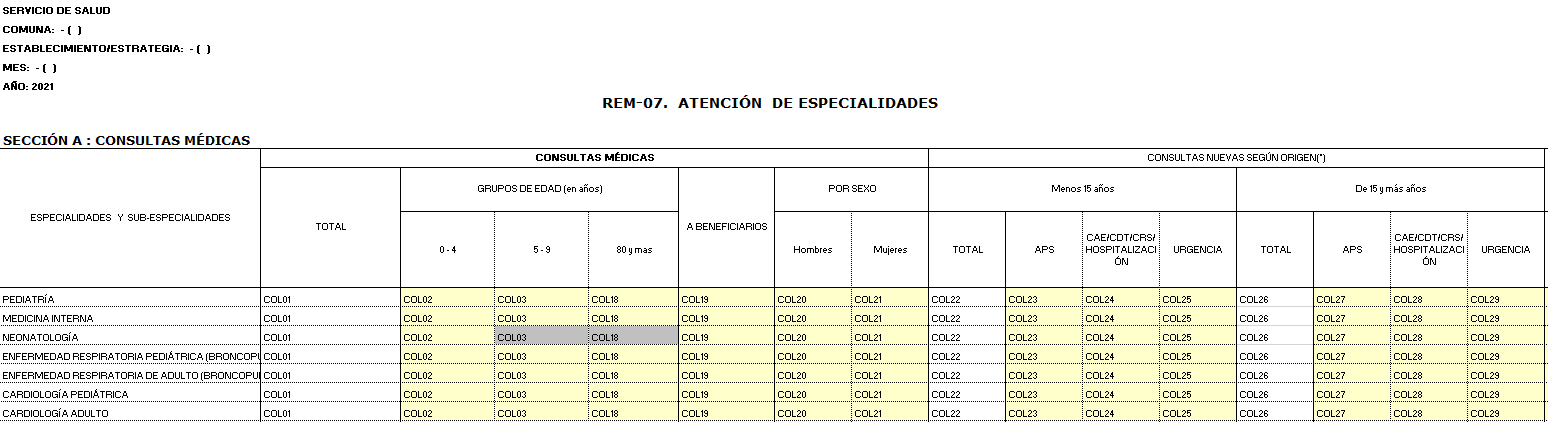

In [16]:
# Ver la distribución de las consultas nuevas, controles y totales
# Tomamos las columnas [filas, columnas] Consultas, Consultas Nuevas < 15 años
# y Consultas Nuevas >= 15 años y generamos un resumen de sus datos
summary(rem[,c('Col01','Col22','Col26')])

     Col01             Col22             Col26         
 Min.   :   0.00   Min.   :  0.000   Min.   :   0.000  
 1st Qu.:   0.00   1st Qu.:  0.000   1st Qu.:   0.000  
 Median :   0.00   Median :  0.000   Median :   0.000  
 Mean   :  28.58   Mean   :  1.536   Mean   :   6.995  
 3rd Qu.:   0.00   3rd Qu.:  0.000   3rd Qu.:   0.000  
 Max.   :4602.00   Max.   :554.000   Max.   :1929.000  
 NA's   :18        NA's   :21        NA's   :18        

In [17]:
# Examinamos el número de registros por Servicio de Salud

rem %>%
  count(IdServicio)

IdServicio,n
<dbl>,<int>
1,3835
2,3461
3,6373
4,3752
5,12219
6,7754
7,13087
8,2929
9,10185


In [18]:
# Contar registros de hospitales del Servicio de Salud Metropolitano Sur Oriente (IdServicio=14)
#filtramos los datos
rem[rem$IdServicio==14,]%>%
  #agrupamos por establecimientos
  dplyr::group_by(IdEstablecimiento)%>%
  #contamos registros
  summarise(count=n())%>%
  #ordenamos de forma decreciente (mayor a menor cantidad)
  arrange(desc(count))

IdEstablecimiento,count
<dbl>,<int>
114101,619
114105,588
114103,501
114301,454
114322,411
114332,400
114321,379
114320,368
114323,355


In [19]:
# Filtrar códigos de los hospitales del SSMSO
centros = c(114101,114103,114105,200282) # Sótero del Río, Padre Hurtado, La Florida, Provincia Cordillera
rem = rem[which(rem$IdEstablecimiento %in% centros),] #vemos las filas [filas,columnas] en las que (which) el IDEstablecimiento es igual a alguno del vector centros

# Mostrar número de registros y una muestra
dplyr::glimpse(rem)
set.seed(2125) #semilla para reproducibilidad
rem[sample(5),]

Rows: 1,947
Columns: 16
$ ...1              <dbl> 20604, 20605, 20606, 20607, 26747, 26748, 27173, 271…
$ Mes               <dbl> 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7…
$ Ano               <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021…
$ IdEstablecimiento <dbl> 114101, 114101, 114101, 114101, 200282, 200282, 1141…
$ CodigoPrestacion  <chr> "07022133", "07022134", "07021700", "07021800", "070…
$ IdRegion          <dbl> 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, …
$ IdServicio        <dbl> 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, …
$ IdComuna          <dbl> 13201, 13201, 13201, 13201, 13201, 13201, 13131, 131…
$ Col01             <dbl> 204, 379, 779, 1493, 35, 115, 117, 1001, 331, 160, 4…
$ Col22             <dbl> 0, 70, 0, 0, 0, 0, 44, 0, 0, 0, 0, 30, 17, 0, 45, 0,…
$ Col26             <dbl> 190, 1, 212, 238, 15, 62, 3, 174, 93, 22, 115, 5, 1,…
$ Col32             <dbl> 5, 13, 55, 11, 57, 17, 21, 49, 26, 9, 37, 5, 0, 11, …
$ Col33         

...1,Mes,Ano,IdEstablecimiento,CodigoPrestacion,IdRegion,IdServicio,IdComuna,Col01,Col22,Col26,Col32,Col33,Col41,Col37,Col38
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26747,5,2021,200282,07024200,13,14,13201,35,0,15,57,4,NA,0,5
20605,6,2021,114101,07022134,13,14,13201,379,70,1,13,62,NA,5,1
20604,6,2021,114101,07022133,13,14,13201,204,0,190,5,4,NA,156,0
20607,6,2021,114101,07021800,13,14,13201,1493,0,238,11,59,NA,0,6
20606,6,2021,114101,07021700,13,14,13201,779,0,212,55,98,NA,0,23


In [20]:
# Exportar a Excel
#paste0() sirve para concatenar: paste0(elemento1,elemento2, elemento_n)
#no exportamos el nombre de las filas como atributo adicional (rowNames= F)
#para exportarlo en formato excel
writexl::write_xlsx(
  rem,
  paste0(datos_crudos, 'rem_A07_2021_SSMSO.xlsx')
)
#con la base de datos rem, se exportan a la ubicación concatenada de datos crudos + nombre de archivo, con formato de extensión *.parquet
#Opción parquet
nanoparquet::write_parquet(
    rem,
    paste0(datos_crudos, "programacion_2021_SSMSO.parquet")
)

## 🏁 Discusión
¿Qué ventajas y desventajas tiene guardar los datos con las columnas con los nombres originales (Col1, Col22, etc) en vez de nombres más amigables (Consultas, Consultas nuevas menor 15, etc)?

# Extraer solicitudes de interconsulta SIGTE

In [21]:
# Cargar hojas de excel en dataframes
#concatenamos para definir el objeto excel_url

# Definir la ruta al archivo Excel
url_excel <- paste0(datos_originales, "SS_MSOr_Respuesta%20Solicitud%20Folio%20AO012T0001655%20(CNE%202021).xlsx")

# Ruta de destino (temporal o permanente)
destino <- tempfile(fileext = ".xlsx")
download.file(url_excel, destfile = destino, mode = "wb")

#Ver hojas:
readxl::excel_sheets(destino)

# Importar las hojas específicas
sic1 <- readxl::read_excel(destino, sheet = "LE ABIERTA ")
sic2 <- readxl::read_excel(destino, sheet = "CNE EGRESOS")

#exploramos los datos y sus propiedades
dplyr::glimpse(sic1)
dplyr::glimpse(sic2)

[1] "Portada"     "diccionario" "LE ABIERTA " "CNE EGRESOS"

Warning message:
“Expecting numeric in A2 / R2C1: got a date”
Warning message:
“Expecting numeric in A3 / R3C1: got a date”
Warning message:
“Expecting numeric in A4 / R4C1: got a date”
Warning message:
“Expecting numeric in A5 / R5C1: got a date”
Warning message:
“Expecting numeric in A6 / R6C1: got a date”
Warning message:
“Expecting numeric in A7 / R7C1: got a date”
Warning message:
“Expecting numeric in A8 / R8C1: got a date”
Warning message:
“Expecting numeric in A9 / R9C1: got a date”
Warning message:
“Expecting numeric in A10 / R10C1: got a date”
Warning message:
“Expecting numeric in A11 / R11C1: got a date”
Warning message:
“Expecting numeric in A12 / R12C1: got a date”
Warning message:
“Expecting numeric in A13 / R13C1: got a date”
Warning message:
“Expecting numeric in A14 / R14C1: got a date”
Warning message:
“Expecting numeric in A15 / R15C1: got a date”
Warning message:
“Expecting numeric in A16 / R16C1: got a date”
Warning message:
“Expecting numeric in A17 / R17C1: got 

Rows: 2,499
Columns: 8
$ FECHA_NAC  <dttm> 2010-11-22, 1987-12-17, 1988-09-07, 1964-07-14, 2017-05-18…
$ SEXO       <chr> "02", "02", "02", "02", "01", "01", "01", "01", "01", "02",…
$ TIPO_PREST <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ PRESTA_MIN <chr> "07-064", "07-056", "07-058", "09-008", "09-008", "07-040",…
$ PRESTA_EST <chr> "NUTRIOLOGO PEDIATRICO", "CIRUGIA ABDOMINAL", "GINECOLOGIA …
$ F_ENTRADA  <dttm> 2021-01-04, 2021-01-04, 2021-01-04, 2021-01-04, 2021-01-04…
$ ESTAB_ORIG <chr> "114101", "114312", "114101", "114101", "114304", "114103",…
$ ESTAB_DEST <dbl> 114101, 114101, 114101, 114101, 114105, 114101, 114101, 114…
Rows: 149,479
Columns: 8
$ FECHA_NAC  <dbl> 23957, 42716, 42687, 44261, 21207, 19801, 20321, 20411, 168…
$ SEXO       <chr> "1", "2", "1", "2", "1", "2", "2", "2", "2", "1", "2", "2",…
$ TIPO_PREST <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ PRESTA_MIN <chr> "07-044", "07-046", "07-046", "07-055", "07-018", "07

In [22]:
# Juntar dataframes y ver resultante

# Suponiendo que sic1 y sic2 ya son data frames en R
sic <- rbind(sic1, sic2) # Concatenar verticalmente

# vemos propiedades
dplyr::glimpse(sic)

#tomamos 5 datos aleatorios y los visualizamos
set.seed(2125)
sic[sample(5),]

Rows: 151,978
Columns: 8
$ FECHA_NAC  <dttm> 2010-11-22, 1987-12-17, 1988-09-07, 1964-07-14, 2017-05-18…
$ SEXO       <chr> "02", "02", "02", "02", "01", "01", "01", "01", "01", "02",…
$ TIPO_PREST <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ PRESTA_MIN <chr> "07-064", "07-056", "07-058", "09-008", "09-008", "07-040",…
$ PRESTA_EST <chr> "NUTRIOLOGO PEDIATRICO", "CIRUGIA ABDOMINAL", "GINECOLOGIA …
$ F_ENTRADA  <dttm> 2021-01-04, 2021-01-04, 2021-01-04, 2021-01-04, 2021-01-04…
$ ESTAB_ORIG <chr> "114101", "114312", "114101", "114101", "114304", "114103",…
$ ESTAB_DEST <chr> "114101", "114101", "114101", "114101", "114105", "114101",…


FECHA_NAC,SEXO,TIPO_PREST,PRESTA_MIN,PRESTA_EST,F_ENTRADA,ESTAB_ORIG,ESTAB_DEST
<dttm>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<chr>,<chr>
2017-05-18,01,1,09-008,Ortodoncia,2021-01-04,114304,114105
1987-12-17,02,1,07-056,CIRUGIA ABDOMINAL,2021-01-04,114312,114101
2010-11-22,02,1,07-064,NUTRIOLOGO PEDIATRICO,2021-01-04,114101,114101
1964-07-14,02,1,09-008,ORTODONCIA,2021-01-04,114101,114101
1988-09-07,02,1,07-058,GINECOLOGIA ADULTO,2021-01-04,114101,114101


In [23]:
# Ver establecimientos de destino con más derivaciones
#sic['ESTAB_DEST'].value_counts()
table(sic$ESTAB_DEST)%>%
  data.frame()%>%
  dplyr::arrange(desc(Freq))%>%
  #reemplazamos el nombre Var1 por ESTAB_DEST, y Freq por counts
  dplyr::rename("ESTAB_DEST"="Var1", "count"="Freq")

ESTAB_DEST,count
<fct>,<int>
114101,76354
114105,28807
114103,27543
200282,17928
114308,655
114323,555
114331,66
114407,19
114306,15


In [24]:
# Filtrar derivaciones a hospitales del SSMSO
centros = c(114101,114103,114105,200282) # Sótero del Río, Padre Hurtado, La Florida, Provincia Cordillera
sic = sic[which(sic$ESTAB_DEST %in% centros),] #vemos las filas base_datos[filas,columnas] en las que (which) el IDEstablecimiento es igual a alguno del vector centros

# vemos propiedades
dplyr::glimpse(sic)

#tomamos 5 datos aleatorios y los visualizamos
set.seed(2125)
sic[sample(5),]

Rows: 150,632
Columns: 8
$ FECHA_NAC  <dttm> 2010-11-22, 1987-12-17, 1988-09-07, 1964-07-14, 2017-05-18…
$ SEXO       <chr> "02", "02", "02", "02", "01", "01", "01", "01", "01", "02",…
$ TIPO_PREST <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ PRESTA_MIN <chr> "07-064", "07-056", "07-058", "09-008", "09-008", "07-040",…
$ PRESTA_EST <chr> "NUTRIOLOGO PEDIATRICO", "CIRUGIA ABDOMINAL", "GINECOLOGIA …
$ F_ENTRADA  <dttm> 2021-01-04, 2021-01-04, 2021-01-04, 2021-01-04, 2021-01-04…
$ ESTAB_ORIG <chr> "114101", "114312", "114101", "114101", "114304", "114103",…
$ ESTAB_DEST <chr> "114101", "114101", "114101", "114101", "114105", "114101",…


FECHA_NAC,SEXO,TIPO_PREST,PRESTA_MIN,PRESTA_EST,F_ENTRADA,ESTAB_ORIG,ESTAB_DEST
<dttm>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<chr>,<chr>
2017-05-18,01,1,09-008,Ortodoncia,2021-01-04,114304,114105
1987-12-17,02,1,07-056,CIRUGIA ABDOMINAL,2021-01-04,114312,114101
2010-11-22,02,1,07-064,NUTRIOLOGO PEDIATRICO,2021-01-04,114101,114101
1964-07-14,02,1,09-008,ORTODONCIA,2021-01-04,114101,114101
1988-09-07,02,1,07-058,GINECOLOGIA ADULTO,2021-01-04,114101,114101


## 🍎 Desafío: Exportar extracto

Exporte los datos en la carpeta *datos_crudos* con los formatos:
1. `xlsx`
2. `csv`
3. `parquet`

☕ Nota: si no recuerda los comandos puede usar la IA para generarlos.

In [30]:
dir.create("datos_crudos", showWarnings = FALSE)

library(writexl)
library(arrow)

# CSV
write.csv(sic, "datos_crudos/sic.csv", row.names = FALSE)

# XLSX
writexl::write_xlsx(sic, "datos_crudos/sic.xlsx")

# Parquet
nanoparquet::write_parquet(sic, "datos_crudos/sic.parquet")

## 🏁 Discusión

1. ¿Cuál formato es el archivo de menor tamaño?
2. ¿Cuál le parece más amigable para consultar?
3. ¿Cuál formato preferiría para almacenar los datos crudos?

# Extraer proyecciones de consultas de las planillas de programación
Ahora realizaremos lo siguiente:
1. Recolección:
  - Cargar múltiples planillas en una carpeta
  - Agregar nombre de archivo
2. Consolidación
  - Unir en un dataframe
  - Exportar datos crudos (preprocesados) en excel/parquet

In [31]:
# definimos carpeta de origen y listado de archivos a consolidar

# Observe que en el repositorio de Github, los datos se encuentran en una subcarpeta
# concatenamos datos_originales con programacion
datos_programacion = paste0(datos_originales, 'programacion/')

#definimos un vector con nombres de plantillas
planillas = c('114105_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx',
             '114101_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx',
             '114103_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx',
             '200282_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx')

In [32]:
# Rutas completas de las planillas
rutas_planillas <- paste0(datos_programacion, planillas)

# Crear un data frame vacío
consolidado <- data.frame()

# -----------------------------------------------------------
# Descargar cada planilla y consolidar
# -----------------------------------------------------------

for (archivo in planillas) {
  # Construir URL completa
  url_archivo <- paste0(datos_programacion, archivo)

  # Crear archivo temporal
  destino_temp <- tempfile(fileext = ".xlsx")

  # Descargar archivo desde GitHub
  download.file(
    url_archivo,
    destfile = destino_temp,
    mode = "wb",
    quiet = TRUE
  )

  # Leer la hoja "Resumen Programación"
  datos <- readxl::read_excel(
    path = destino_temp, #de cada plantilla descargada
    sheet = "Resumen Programación", #seleccionar la hoja
    skip = 2, # saltarse 2 columnas
    col_names = TRUE #dejar como columnas
  )%>%
    #seleccionar las columnas que calcen con este nombre
    dplyr::select(
      dplyr::matches("Especialidad"),
      dplyr::matches("Consulta Nueva"),
      dplyr::matches("Consulta controles"),
      dplyr::matches("Total$") #$= nombre col. termina en "Total"
  )

  # Agregar el nombre del archivo y unir
  datos$Archivo <- archivo
  consolidado <- rbind(consolidado, datos)
}

names(consolidado)

# -----------------------------------------------------------
# Seleccionar columnas de interés
# -----------------------------------------------------------

#seleccionar columnas de interés
consolidado <- consolidado[, c(
  "Especialidad  Medica",
  "Consulta Nueva",
  "Consulta controles",
  "Total",
  "Archivo"
)]

#fijarse en los espacios de las columnas. Especialidad Medica tiene doble espacio
# revisamos la información del consolidado
dplyr::glimpse(consolidado)

New names:
• `` -> `...5`
• `` -> `...8`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
New names:
• `` -> `...5`
• `` -> `...8`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
New names:
• `` -> `...5`
• `` -> `...8`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
New names:
• `` -> `...5`
• `` -> `...8`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`


[1] "Especialidad  Medica" "Consulta Nueva"       "Consulta controles"  
[4] "Total"                "Archivo"

Rows: 260
Columns: 5
$ `Especialidad  Medica` <chr> "PEDIATRÍA", "MEDICINA INTERNA", "NEONATOLOGÍA"…
$ `Consulta Nueva`       <dbl> 7463, 6827, 319, 1801, 4972, 316, 4049, 1078, 3…
$ `Consulta controles`   <dbl> 4380, 2724, 80, 889, 1509, 142, 2164, 745, 1132…
$ Total                  <dbl> 11843, 9551, 399, 2690, 6481, 458, 6213, 1823, …
$ Archivo                <chr> "114105_Planilla_programacion_PM_y_PNM_2021_FN_…


In [33]:
# revisamos una muestra
set.seed(2125)
consolidado[sample(5),]

Especialidad Medica,Consulta Nueva,Consulta controles,Total,Archivo
<chr>,<dbl>,<dbl>,<dbl>,<chr>
ENFERMEDAD RESPIRATORIA DE ADULTO (BRONCOPULMONAR),4972,1509,6481,114105_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx
MEDICINA INTERNA,6827,2724,9551,114105_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx
PEDIATRÍA,7463,4380,11843,114105_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx
ENFERMEDAD RESPIRATORIA PEDIÁTRICA (BRONCOPULMONAR INFANTIL),1801,889,2690,114105_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx
NEONATOLOGÍA,319,80,399,114105_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx


In [34]:
# exportamos a excel o formato preferido
writexl::write_xlsx(
  consolidado,
  path = paste0(datos_crudos, "programacion_2021_SSMSO.xlsx")
)
#Opción parquet
nanoparquet::write_parquet(
    consolidado,
    paste0(datos_crudos, "programacion_2021_SSMSO.parquet")
)

## 🏁 Discusión

1. ¿Qué beneficios tiene guardar los datos crudos aparte de los archivos originales?
2. ¿Cuándo puede ser innecesario?
3. ¿Qué ventajas y deventajas tiene hacer esta tarea en excel?
4. ¿Qué ventajas y desventajas tiene hacer esta tarea con un lenguaje de programación?

# 🍎 Desafío: Extraer establecimientos

1. Obtenga la base de establecimientos de salud del DEIS, ubicada en la dirección: https://repositoriodeis.minsal.cl/DatosAbiertos/Establecimientos%20DEIS%20MINSAL%2007-01-2026.xlsx
  - ⚠ Note que el archivo tiene un título en la primera fila
2. Almacene el extracto en la carpeta *datos_crudos* en un formato rápido de cargar

In [37]:
# Paquetes
if (!requireNamespace("readxl", quietly = TRUE)) install.packages("readxl")
if (!requireNamespace("arrow", quietly = TRUE)) install.packages("arrow")

library(readxl)
library(arrow)

# 1) URL del archivo
url_estab <- "https://repositoriodeis.minsal.cl/DatosAbiertos/Establecimientos%20DEIS%20MINSAL%2007-01-2026.xlsx"

# 2) Crear carpeta datos_crudos
dir.create("datos_crudos", showWarnings = FALSE)

# 3) Descargar el archivo a un temporal
archivo_tmp <- tempfile(fileext = ".xlsx")
download.file(url_estab, archivo_tmp, mode = "wb")

# 4) Leer el Excel saltando la primera fila (título)
establecimientos <- read_excel(
  path = archivo_tmp,
  sheet = 1,      # primera hoja
  skip = 1,       # salta la fila del título
  guess_max = 50000
)

# 5) Asegurar que columnas con "Código" sean texto (evita problemas)
cols_codigo <- grep("C[oó]digo", names(establecimientos), value = TRUE)
establecimientos[cols_codigo] <- lapply(establecimientos[cols_codigo], as.character)

# 6) Guardar en formato rápido: Parquet
out_path <- file.path("datos_crudos", "establecimientos_deis_2026-01-07.parquet")
write_parquet(establecimientos, out_path)

# 7) Verificación
cat("✅ Archivo guardado en:", out_path, "\n")
dim(establecimientos)
head(establecimientos, 3)

✅ Archivo guardado en: datos_crudos/establecimientos_deis_2026-01-07.parquet 


[1] 5148   32

Código Antiguo,Código Vigente,Código Madre Antiguo,Código Madre Nuevo,Código Región,Nombre Región,Código Dependencia Jerárquica (SEREMI / Servicio de Salud),Nombre Dependencia Jerárquica (SEREMI / Servicio de Salud),Pertenencia al SNSS,Tipo Establecimiento (Unidad),⋯,Tiene Servicio de Urgencia,Tipo de Urgencia,Clasificación Tipo de SAPU,LATITUD [Grados decimales],LONGITUD [Grados decimales],Tipo de Prestador Sistema de Salud,Estado de Funcionamiento,Nivel de Complejidad,Tipo de Atención,Fecha de Incorporación a la base
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
26-704,126704,NA,NA,12,Región de Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios de Salud,Hospital,⋯,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.935209999999998,-67.600390000000004,Público,Vigente en operación habitual,Baja Complejidad,Atención Cerrada-Hospitalaria,NA
26-204,126204,NA,NA,12,Región de Magallanes y de la Antártica Chilena,12,SEREMI de Magallanes y la Antártica Chilena,No perteneciente al Sistema Nacional de Servicios de Salud,Hospital,⋯,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.934373999999998,-67.608895000000004,Fuerzas Armadas y de Orden,Vigente en operación habitual,Mediana Complejidad,Atención Cerrada-Hospitalaria,44841
26-412,126412,NA,NA,12,Región de Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios de Salud,Posta de Salud Rural (PSR),⋯,NO,No Aplica,No Aplica,-53.640549999999998,-69.645849999999996,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,NA


# 📎ANEXO: Extraer REM 2021

Extracción de Resúmenes Estadísticos Mensuales (REM) del año 2021 disponibles en https://deis.minsal.cl/#datosabiertos

In [38]:
# REM 2021
url='https://repositoriodeis.minsal.cl/DatosAbiertos/REM/SERIE_REM_2021.zip'

In [39]:
# 1️⃣ Descargar ZIP temporal
temp_zip <- tempfile(fileext = ".zip")
#bajamos el archivo desde la url a la ubicación que queremos
download.file(url, temp_zip, mode = "wb", quiet = TRUE)

# 2️⃣ Listar archivos (función BASE)
zip_files <- unzip(temp_zip, list = TRUE)$Name
print("Archivos en ZIP:")
print(zip_files)

# 3️⃣ Leer archivo específico directamente
txt_file <- "2021/SerieA_2021.txt"
if (txt_file %in% zip_files) {
  # Leemos los archivos como tablas separadas por punto y coma y cuyo encabezado es la primera fila (header= TRUE)
  data <- read.table(unz(temp_zip, txt_file), sep = ";", header = TRUE)
  print("✅ Archivo leído correctamente:")
  print(head(data)) # Muestra las primeras filas del archivo leído
} else {
  print("❌ Archivo no encontrado")#en caso de error, lo advertirá
}

# 4️⃣ LIMPIAR, sacando el archivo temporal
unlink(temp_zip)


[1] "Archivos en ZIP:"
 [1] "2021/"                                     
 [2] "2021/DICCIONARIOS/"                        
 [3] "2021/DICCIONARIOS/SA_21_V1.2-CODIGOS.xlsm" 
 [4] "2021/DICCIONARIOS/SBM_21_V1.0-CODIGOS.xlsm"
 [5] "2021/DICCIONARIOS/SBS_21_V1.0 CODIGOS.xlsm"
 [6] "2021/DICCIONARIOS/SD_21_V1.0-CODIGOS.xlsm" 
 [7] "2021/DICCIONARIOS/SP_21_V1.1 CODIGOS.xlsm" 
 [8] "2021/SerieA_2021.txt"                      
 [9] "2021/SerieBM_2021.txt"                     
[10] "2021/SerieBS_2021.txt"                     
[11] "2021/SerieD_2021.txt"                      
[12] "2021/SerieP_2021.txt"                      
[1] "✅ Archivo leído correctamente:"
  Mes IdServicio  Ano IdEstablecimiento CodigoPrestacion IdRegion IdComuna
1   7         11 2021            111607         06020201       13    13119
2   7         11 2021            111607         06020208       13    13119
3   8         11 2021            111609         06901600       13    13101
4   8         11 2021            111609 

In [40]:
dplyr::glimpse(data) #exploramos los datos, sus propiedades/clase, número de columnas y filas, etc.

Rows: 4,742,691
Columns: 57
$ Mes               <int> 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 8, 8…
$ IdServicio        <int> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, …
$ Ano               <int> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021…
$ IdEstablecimiento <int> 111607, 111607, 111609, 111609, 111609, 111609, 1116…
$ CodigoPrestacion  <chr> "06020201", "06020208", "06901600", "06902300", "059…
$ IdRegion          <int> 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, …
$ IdComuna          <int> 13119, 13119, 13101, 13101, 13101, 13101, 13101, 131…
$ Col01             <chr> "55", "1013", "3", "5", "1", "2", "1", "2", "0", "2"…
$ Col02             <chr> "30", "406", "2", "0", "0", "0", "0", "2", "0", "2",…
$ Col03             <chr> "25", "607", "1", "5", "1", "2", "1", "0", "0", "0",…
$ Col04             <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", …
$ Col05             <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", …
$ Col06     

### Diccionario REM-07. ATENCIÓN DE ESPECIALIDADES
*Archivo: SA_21_V1.2-CODIGOS.xlsm*


- TOTAL CONSULTAS: COL01
- TOTAL CONSULTAS NUEVAS
  - COL22: TOTAL Menos 15 años
  - COL26: TOTAL De 15 y más años
- INASISTENTE A CONSULTA MÉDICA (NSP):
  - COL32 (NUEVAS)
  - COL33 (CONTROLES)
- COMPRA DE SERVICIO: COL41
- ALTA DE CONSULTA DE ESPECIALIDAD AMBULATORIA
  - COL37 "Menos 15 años"
  - COL38 "15 y más años"





In [41]:
# Filtrar columnas relevantes
columnas <- c("Mes", "Ano", "IdEstablecimiento", "CodigoPrestacion",
              "IdRegion", "IdServicio", "IdComuna",
              "Col01", "Col22", "Col26", "Col32", "Col33", "Col41", "Col37", "Col38")
rem <- data[, columnas, drop = FALSE] # Subconjunto de columnas

# Definir las prestaciones a filtrar
prestaciones <- c('07020130', '07020230', '07020330', '07020331', '07020332', '07024219',
                  '07020500', '07020501', '07020600', '07020601', '07020700', '07020800',
                  '07020801', '07020900', '07020901', '07021000', '07021001', '07021100',
                  '07021101', '07021230', '07021300', '07021301', '07022000', '07022001',
                  '07021531', '07022132', '07022133', '07022134', '07021700', '07021800',
                  '07021801', '07021900', '07022130', '07022142', '07022143', '07022144',
                  '07022135', '07022136', '07022137', '07022700', '07022800', '07022900',
                  '07021701', '07023100', '07023200', '07023201', '07023202', '07023203',
                  '07023700', '07023701', '07023702', '07023703', '07024000', '07024001',
                  '07024200', '07030500', '07024201', '07024202', '07030501', '07030502')

# Filtrar filas donde CodigoPrestacion está en (%in%) las prestaciones seleccionadas
# fijarse muy bien que estén en el mismo formato (string o numérico, dependiendo de lo que se filtre, y si tiene antepuesto los 0s, etc)
rem <- rem[rem$CodigoPrestacion %in% prestaciones, ]

# Información del subconjunto resultante
cat("Información del subconjunto:\n")
str(rem)

# Muestra aleatoria de 5 filas del subconjunto resultante
cat("\nMuestra aleatoria:\n")
set.seed(2125)# añadimos semilla para reproducibilidad
print(rem[sample(nrow(rem), 5), ])


Información del subconjunto:
'data.frame':	231114 obs. of  15 variables:
 $ Mes              : int  8 8 8 8 7 11 11 2 2 2 ...
 $ Ano              : int  2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 ...
 $ IdEstablecimiento: int  111100 111100 111100 111100 107311 107305 107305 107435 107435 107435 ...
 $ CodigoPrestacion : chr  "07022143" "07022144" "07022135" "07022137" ...
 $ IdRegion         : int  13 13 13 13 5 5 5 5 5 5 ...
 $ IdServicio       : int  11 11 11 11 7 7 7 7 7 7 ...
 $ IdComuna         : int  13101 13101 13101 13101 5501 5103 5103 5502 5502 5502 ...
 $ Col01            : chr  "250" "427" "60" "213" ...
 $ Col22            : chr  "0" "7" "12" "0" ...
 $ Col26            : chr  "120" "114" "0" "98" ...
 $ Col32            : chr  "13" "57" "2" "18" ...
 $ Col33            : chr  "31" "32" "3" "21" ...
 $ Col41            : chr  "" "" "" "" ...
 $ Col37            : chr  "0" "2" "0" "0" ...
 $ Col38            : chr  "0" "14" "0" "2" ...

Muestra aleatoria:
        Me

In [42]:
# Exportar a archivo csv, separado por puntos y comas
write.table(
  rem, #objeto a escribir
  file = "rem_A07_2021.txt", #ruta y cómo lo guarda
  sep = ";", #separado por puntos y comas
  row.names = FALSE # no incluimos el nombre de las filas
)